#Student Weak Subject analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('student_math_performance_modified.csv')

In [3]:
df.head()

,Student_ID,Name,Section,Total_Marks,Geometry,Algebra,Calculus,Trigonometry,Number Theory,Statistics,Set Theory,Discrete Math
0,101,James,A,80,6,5,10,5,9,32,7,6
1,102,William,C,80,5,36,7,5,5,6,9,7
2,103,Lucas,A,80,5,31,10,6,5,9,5,9
3,104,John,B,80,7,8,7,8,6,9,26,9
4,105,Daniel,B,80,6,8,9,10,7,22,9,9


In [4]:
score_columns = df.columns[4:]  

# Calculate mean and standard deviation for each topic
mean_scores = df[score_columns].mean().sort_values()
std_dev_scores = df[score_columns].std().sort_values()

# Display results
print("📊 **Mean Scores for Each Topic:**")
print(mean_scores)

print("\n📊 **Standard Deviation for Each Topic:**")
print(std_dev_scores)

📊 **Mean Scores for Each Topic:**
Number Theory     8.02
Discrete Math     9.44
Calculus          9.64
Set Theory        9.82
Geometry         10.00
Trigonometry     10.42
Algebra          10.46
Statistics       12.20
dtype: float64

📊 **Standard Deviation for Each Topic:**
Number Theory    4.492579
Calculus         6.143721
Geometry         6.624013
Discrete Math    6.649106
Set Theory       7.258183
Trigonometry     7.532487
Algebra          7.532813
Statistics       8.903107
dtype: float64


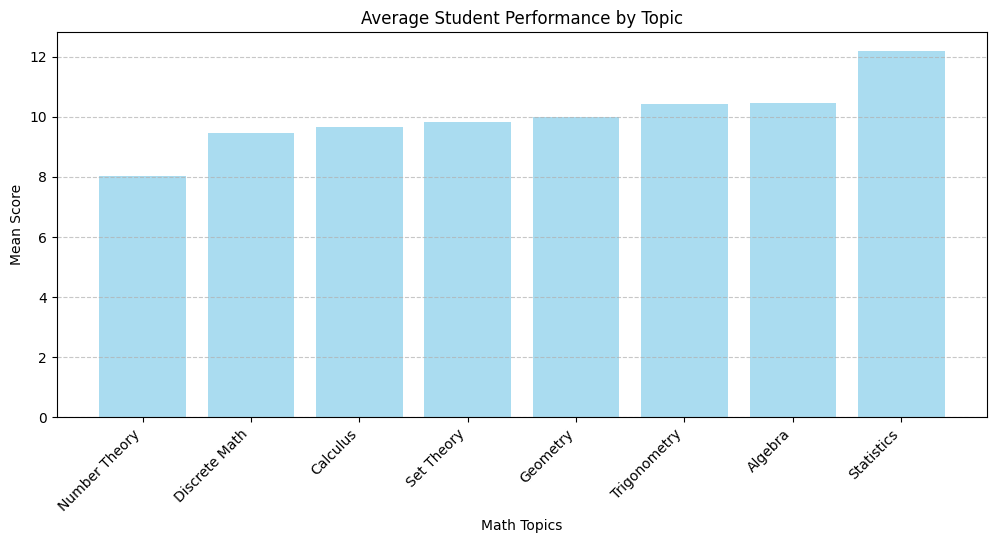

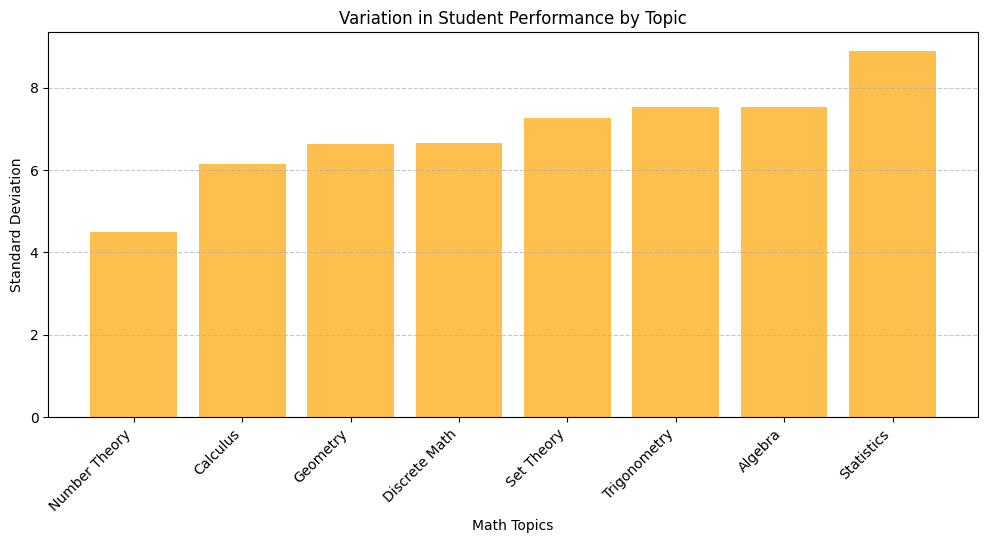

In [5]:
# Plot Mean Scores
plt.figure(figsize=(12, 5))
plt.bar(mean_scores.index, mean_scores.values, color='skyblue', alpha=0.7)
plt.xlabel("Math Topics")
plt.ylabel("Mean Score")
plt.title("Average Student Performance by Topic")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Plot Standard Deviation
plt.figure(figsize=(12, 5))
plt.bar(std_dev_scores.index, std_dev_scores.values, color='orange', alpha=0.7)
plt.xlabel("Math Topics")
plt.ylabel("Standard Deviation")
plt.title("Variation in Student Performance by Topic")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


# creating k-means for grouping student into weak, avg and strong

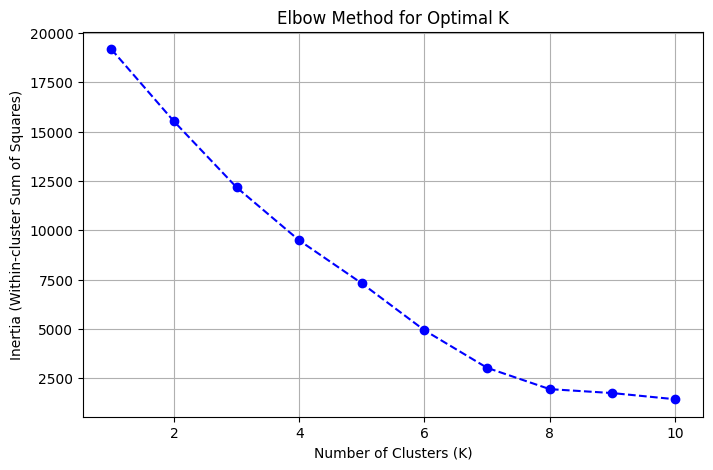

In [6]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Select only score-related columns dynamically (starting from column index 4)
score_columns = df.columns[4:]  

# Extract data for clustering
X = df[score_columns]

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(1, 11)  # Checking for K=1 to K=10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Append the inertia (sum of squared distances)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)  
kmeans

KMeans(n_clusters=3, n_init=10, random_state=42)

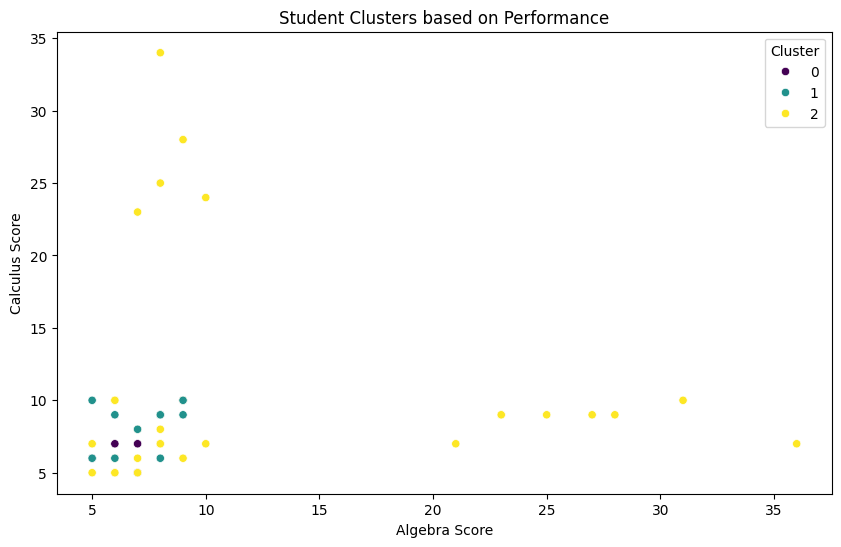

In [8]:
# to vsualize student are divided among weak, average and strong
# here 0 refers to weak, 1 refers to average and 2 refers to strong

import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Algebra'], y=df['Calculus'], hue=df['Cluster'], palette='viridis')
plt.xlabel("Algebra Score")
plt.ylabel("Calculus Score")
plt.title("Student Clusters based on Performance")
plt.show()

note: 
K-Means groups students into clusters based on similar performance trends.
Elbow Method helps decide the best number of clusters (K).
Clusters indicate weak, average, and strong students.
We can visualize the clusters to better understand student performance patterns.

Note2: we used clustering for grouping students based on performance.
and now we will use decision tree for identifying which topics influence student performance the most.

# Decision tree for identifying weak topic

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

In [21]:
import pandas as pd

df = pd.read_csv("student_math_performance_modified.csv")
print(df.head())  # Check first few rows
print(df.info())  # Check for missing values
print(df.describe())  # Get statistics`

   Student_ID     Name Section  Total_Marks  Geometry  Algebra  Calculus  \
0         101    James       A           80         6        5        10   
1         102  William       C           80         5       36         7   
2         103    Lucas       A           80         5       31        10   
3         104     John       B           80         7        8         7   
4         105   Daniel       B           80         6        8         9   

   Trigonometry  Number Theory  Statistics  Set Theory  Discrete Math  
0             5              9          32           7              6  
1             5              5           6           9              7  
2             6              5           9           5              9  
3             8              6           9          26              9  
4            10              7          22           9              9  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Col

In [26]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
# Load dataset
file_path = "student_math_performance_modified.csv"  # Update with correct path if needed
df = pd.read_csv(file_path)

# Drop unnecessary columns
df = df.drop(columns=["Name", "Section", "Total_Marks"])

# Identify the weakest topic for each student (column with the lowest score)
df["Weakest_Topic"] = df.iloc[:, 1:].idxmin(axis=1)  

# Encode Weakest_Topic for classification
label_encoder = LabelEncoder()
df["Weakest_Topic_Label"] = label_encoder.fit_transform(df["Weakest_Topic"])


In [24]:
# Prepare features and target variable
X = df.drop(columns=["Student_ID", "Weakest_Topic", "Weakest_Topic_Label"])
y = df["Weakest_Topic_Label"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(X_train, y_train)

# Predictions and accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


/var/folders/6_/hsnplshs6v396jqrnff1dfyr0000gn/T/ipykernel_9160/1136438838.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clf.feature_importances_, y=X.columns, palette="Blues_r")


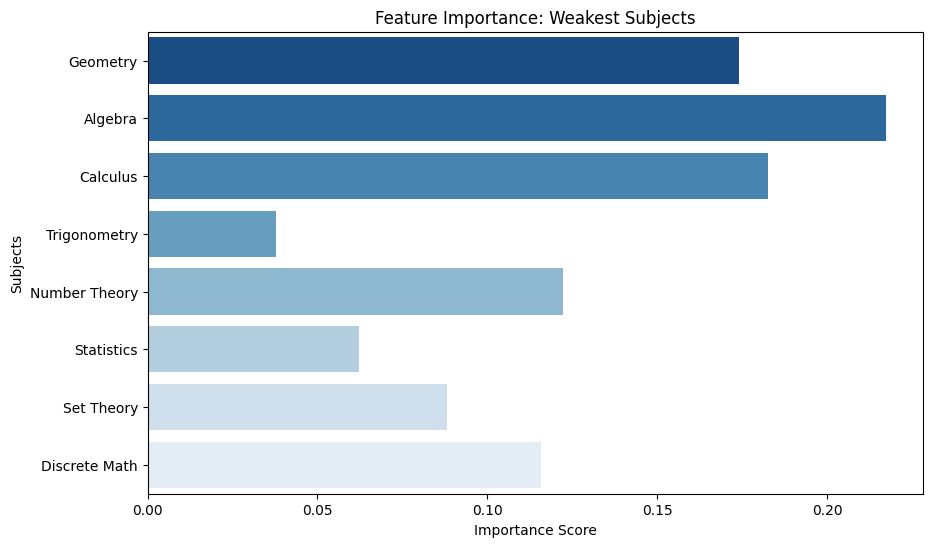

Model Accuracy: 0.3
First 5 Predicted Weakest Topics: ['Algebra' 'Calculus' 'Calculus' 'Number Theory' 'Statistics']


In [25]:

# Feature importance visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=clf.feature_importances_, y=X.columns, palette="Blues_r")
plt.xlabel("Importance Score")
plt.ylabel("Subjects")
plt.title("Feature Importance: Weakest Subjects")
plt.show()

# Output accuracy and first few predictions
print("Model Accuracy:", accuracy)
print("First 5 Predicted Weakest Topics:", label_encoder.inverse_transform(y_pred[:5]))

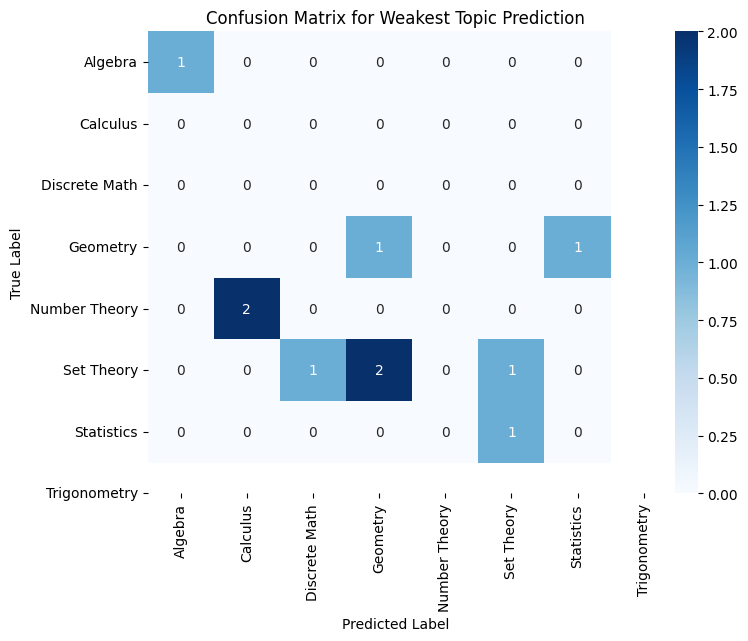

In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Weakest Topic Prediction")
plt.show()